In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [5]:
#data collection
df=pd.read_csv("/content/drive/MyDrive/ML Practice/Car Price Prediction/data/car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [11]:
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [12]:
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [24]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},
            'Seller_Type':{'Dealer':0,'Individual':1},
            'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [26]:
X = df.drop(columns=['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=2)

In [28]:
X_train.shape, X_test.shape

((270, 7), (31, 7))

In [29]:
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [32]:
y_pred=model.predict(X_train)
score=metrics.r2_score(y_pred,y_train)
score


0.8635655509198777

In [33]:
y_pred1=model.predict(X_test)
score1=metrics.r2_score(y_pred1,y_test)
score1

0.8062199941176358

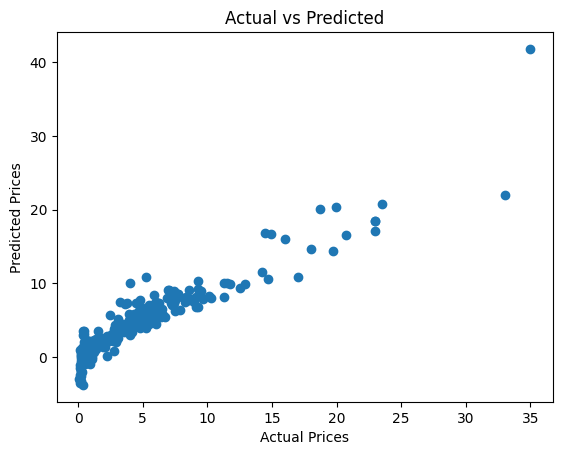

In [35]:
plt.scatter(y_train,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()


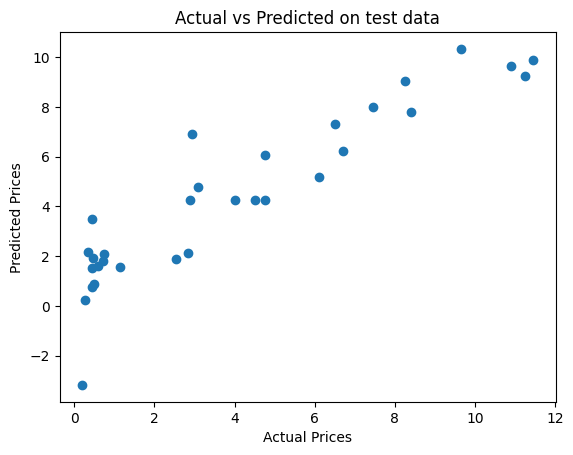

In [36]:
plt.scatter(y_test,y_pred1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted on test data")
plt.show()


In [37]:
model1=Lasso()
model1.fit(X_train,y_train)

Lasso()

In [38]:
y_pred=model1.predict(X_train)
score=metrics.r2_score(y_pred,y_train)
score

0.798459024070425

In [39]:
y_pred1=model1.predict(X_test)
score1=metrics.r2_score(y_pred1,y_test)
score1

0.7711110403265475